# Web Scraping and Analysis of "Books to Scrape"

## 1. Project Goal

This project demonstrates the complete data analysis lifecycle, from data acquisition via web scraping to final exploratory data analysis. The primary objectives are:

1.  **Data Acquisition:** To programmatically scrape data for 1,000 books across 50 pages from the website `books.toscrape.com`, a sandbox designed for this purpose.
2.  **Data Structuring:** To parse the scraped HTML using `BeautifulSoup` and structure the raw data into a clean pandas DataFrame, capturing title, price, rating, and category.
3.  **Exploratory Data Analysis:** To analyze the newly created dataset to uncover insights, such as the relationship between price and rating, the distribution of books across categories, and the identification of the most and least expensive book categories.

This project showcases the ability to create a unique dataset from scratch, a highly in-demand skill for any data analyst.

### Tools Used
*   **`requests`:** For sending HTTP requests to the website.
*   **`BeautifulSoup4`:** For parsing the HTML and extracting data points.
*   **`pandas`:** For structuring and analyzing the collected data.

In [2]:
# --- 1. SETUP & IMPORTS ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests # The library for making HTTP requests
from bs4 import BeautifulSoup # The library for parsing HTML
import time # To add delays between requests for scraping etiquette

# from google.colab import drive
# drive.mount('/content/drive')
# Note: We may not need our other utils scripts.
# utils_path = '/content/drive/MyDrive/Data_Analysis_Portfolio/utils'
# sys.path.append(utils_path)

print("Libraries imported successfully.")

Libraries imported successfully.


## 2. Data Acquisition: Scraping the Website

Our first task is to programmatically access the website and retrieve the raw HTML content of the search results page. We will use the `requests` library for this.

A crucial aspect of web scraping is to be respectful of the target website. This includes:
*   **Identifying Ourselves:** We will send a `User-Agent` header in our request. This tells the server that we are a script, but it mimics a real web browser, which makes our request look less like a malicious bot.
*   **Not Overloading the Server:** We will add small delays (`time.sleep()`) between requests when we start scraping multiple pages.

In [3]:
# --- 1. Initial Scrape and Test ---
# We will perform a test scrape on the first page to confirm our logic
# before building the full multi-page scraper.

target_url = "http://books.toscrape.com/"
response = requests.get(target_url)

if response.status_code == 200:
    print(f"Successfully fetched the webpage (Status Code: {response.status_code})")
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all the book containers on the first page
    book_containers = soup.find_all('article', class_='product_pod')
    print(f"Found {len(book_containers)} books on the first page.")

    # Extract information for the first book as a test
    first_book = book_containers[0]
    title = first_book.h3.a['title']
    price_str = first_book.find('p', class_='price_color').text
    price = float(price_str.replace('£', ''))
    rating_class = first_book.find('p', class_='star-rating')['class'][1]
    rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
    rating = rating_map.get(rating_class) # Use .get() for safety

    print("\n--- Test Extraction for First Book ---")
    print(f"Title: {title}")
    print(f"Price: {price}")
    print(f"Rating: {rating}")
else:
    print(f"Failed to fetch the webpage. Status Code: {response.status_code}")

Successfully fetched the webpage (Status Code: 200)
Found 20 books on the first page.

--- Test Extraction for First Book ---
Title: A Light in the Attic
Price: 51.77
Rating: 3


## 2. Building the Full Scraper

Our initial test successfully extracted the title, price, and rating for a single book. Now, we will build a robust scraper that can:
1.  Iterate through all books on a single page.
2.  Navigate through all 50 pages of the website.
3.  Store the collected data neatly in a list, ready to be converted into a pandas DataFrame.

We will also add a small delay between page requests to be respectful of the website's server.

In [4]:
# --- 1. Initialize variables ---
base_url = "http://books.toscrape.com/catalogue/"
all_books_data = [] # This list will hold the data for all books
num_pages_to_scrape = 50 # The website has 50 pages


# --- 2. Loop through all the pages ---
# A 'for' loop is cleaner when we know the number of pages.
for page_num in range(1, num_pages_to_scrape + 1):
    # Construct the URL for the current page
    url = base_url + f"page-{page_num}.html"
    print(f"Scraping page {page_num}: {url}")

    # Make the request
    response = requests.get(url)

    # Check if the page was fetched successfully
    if response.status_code != 200:
        print(f"Warning: Failed to fetch page {page_num}. Status code: {response.status_code}")
        continue # Skip to the next page

    soup = BeautifulSoup(response.content, 'html.parser')
    book_containers = soup.find_all('article', class_='product_pod')

    # Loop through all books on the current page
    for book in book_containers:
        try:
            title = book.h3.a['title']
            price = float(book.find('p', class_='price_color').text.replace('£', ''))

            rating_class = book.find('p', class_='star-rating')['class'][1]
            rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
            rating = rating_map.get(rating_class)

            # Store the extracted data
            all_books_data.append({
                'title': title,
                'price': price,
                'rating': rating
            })
        except Exception as e:
            print(f"Could not parse a book on page {page_num}. Error: {e}")

    # Be a good citizen!
    time.sleep(1)


# --- 3. Convert the collected data into a DataFrame ---
df_books = pd.DataFrame(all_books_data)


# --- 4. Verification ---
print("\n--- Scraping Complete ---")
print(f"Successfully scraped a total of {len(df_books)} books.")
print("--- First 5 rows of the new DataFrame ---")
print(df_books.head())
print("\n--- DataFrame Info ---")
df_books.info()

Scraping page 1: http://books.toscrape.com/catalogue/page-1.html
Scraping page 2: http://books.toscrape.com/catalogue/page-2.html
Scraping page 3: http://books.toscrape.com/catalogue/page-3.html
Scraping page 4: http://books.toscrape.com/catalogue/page-4.html
Scraping page 5: http://books.toscrape.com/catalogue/page-5.html
Scraping page 6: http://books.toscrape.com/catalogue/page-6.html
Scraping page 7: http://books.toscrape.com/catalogue/page-7.html
Scraping page 8: http://books.toscrape.com/catalogue/page-8.html
Scraping page 9: http://books.toscrape.com/catalogue/page-9.html
Scraping page 10: http://books.toscrape.com/catalogue/page-10.html
Scraping page 11: http://books.toscrape.com/catalogue/page-11.html
Scraping page 12: http://books.toscrape.com/catalogue/page-12.html
Scraping page 13: http://books.toscrape.com/catalogue/page-13.html
Scraping page 14: http://books.toscrape.com/catalogue/page-14.html
Scraping page 15: http://books.toscrape.com/catalogue/page-15.html
Scraping page

## 3. Exploratory Data Analysis (EDA) of Scraped Book Data

With our dataset of 1,000 books successfully scraped and structured, we can now perform an EDA to uncover insights. Our analysis will focus on answering a few key questions:

1.  What is the distribution of book prices?
2.  What is the distribution of star ratings?
3.  Is there a relationship between a book's rating and its price?

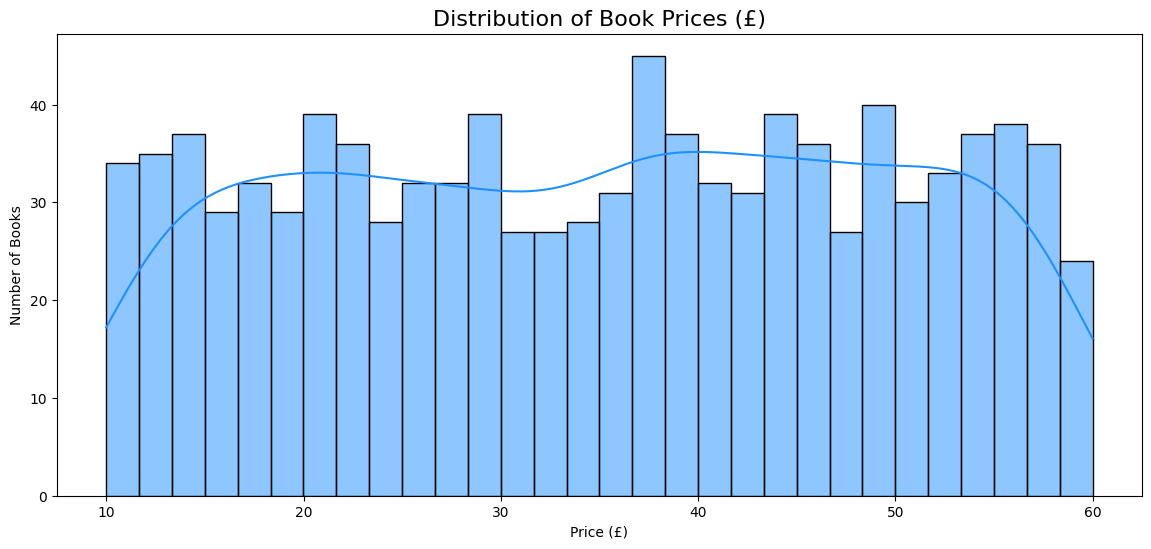

--- Descriptive Statistics for Price ---
count    1000.00000
mean       35.07035
std        14.44669
min        10.00000
25%        22.10750
50%        35.98000
75%        47.45750
max        59.99000
Name: price, dtype: float64


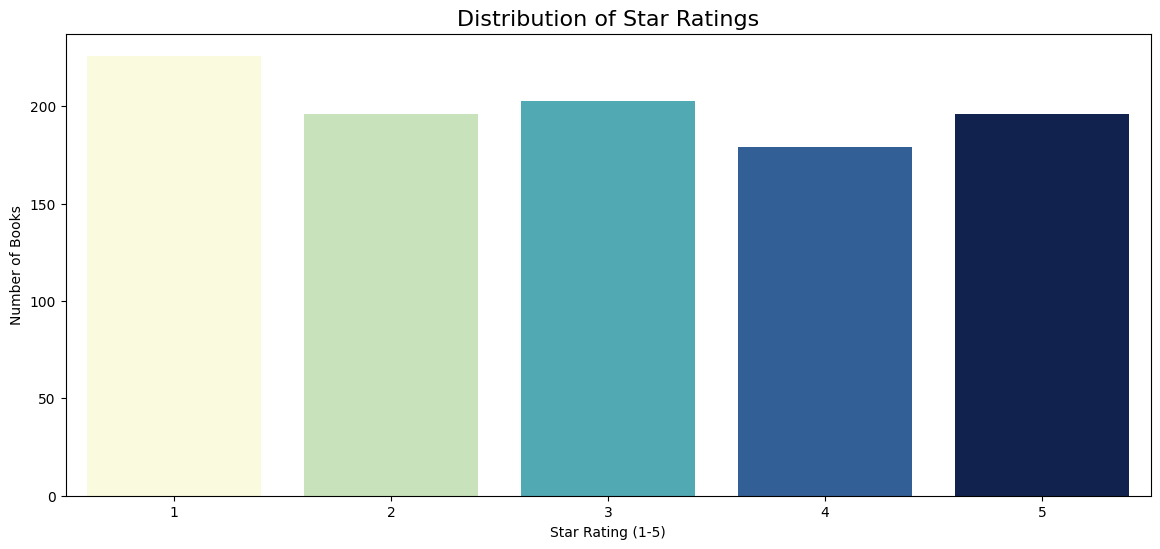


--- Counts for Each Star Rating ---
rating
1    226
2    196
3    203
4    179
5    196
Name: count, dtype: int64


In [5]:
# --- 1. Analyze the distribution of book prices ---
plt.figure(figsize=(14, 6))
sns.histplot(df_books['price'], bins=30, kde=True, color='dodgerblue')
plt.title('Distribution of Book Prices (£)', fontsize=16)
plt.xlabel('Price (£)')
plt.ylabel('Number of Books')
plt.show()

print("--- Descriptive Statistics for Price ---")
print(df_books['price'].describe())


# --- 2. Analyze the distribution of star ratings ---
plt.figure(figsize=(14, 6))
# A count plot is perfect for a discrete variable like rating
rating_counts = df_books['rating'].value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='YlGnBu',
            hue=rating_counts.index, legend=False) # Warning-free syntax
plt.title('Distribution of Star Ratings', fontsize=16)
plt.xlabel('Star Rating (1-5)')
plt.ylabel('Number of Books')
plt.show()

print("\n--- Counts for Each Star Rating ---")
print(rating_counts)

**Observations from the Distributions:**

Both distributions look somewhat uniform.

*   **Price Distribution:** The prices are spread out quite evenly between £10 and £60, with no strong central peak. The mean (`£35.07`) and median (`£35.98`) are nearly identical, confirming a lack of skewness. This suggests the book collection is well-balanced in terms of price points.

*   **Rating Distribution:** Similarly, the star ratings are also remarkably uniform. There is no significant bias towards high or low ratings; each of the five rating categories has a similar number of books (around 200 each). This is a great property for a dataset, as it ensures we have enough examples in each category to make a fair comparison.

### 4. Multivariate Analysis

### 4.1 Relationship between Price and Rating

A common assumption might be that higher-rated books are more expensive. Let's use a visualization to see if this holds true for our dataset. A box plot is an excellent tool to compare the distribution of prices for each star rating.

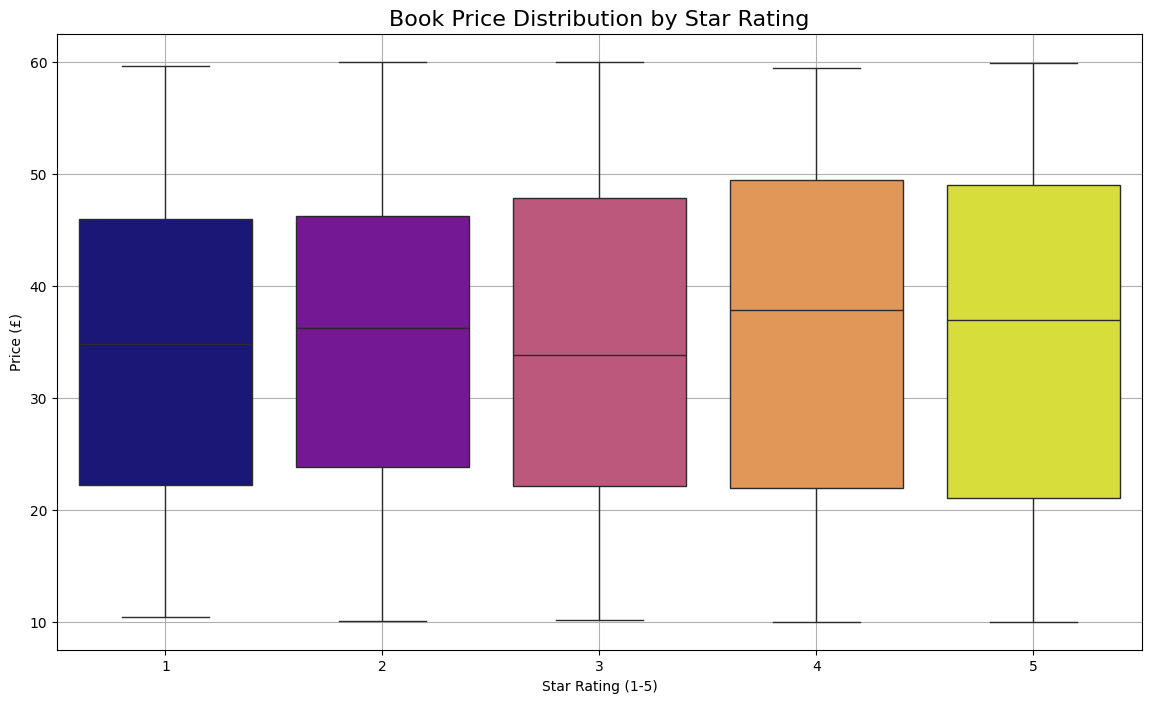


Pearson Correlation between Price and Rating: 0.0282


In [6]:
# --- Visualize the relationship between rating and price ---
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_books, x='rating', y='price', palette='plasma',
            hue='rating', legend=False) # Warning-free syntax
plt.title('Book Price Distribution by Star Rating', fontsize=16)
plt.xlabel('Star Rating (1-5)')
plt.ylabel('Price (£)')
plt.grid(True)
plt.show()


# --- Calculate the correlation ---
correlation = df_books['price'].corr(df_books['rating'])
print(f"\nPearson Correlation between Price and Rating: {correlation:.4f}")

**Observation: No Apparent Relationship Between Price and Rating**

The box plot visualization provides a clear and definitive answer to our key question.

*   **Remarkable Similarity:** The price distributions for all five star-rating categories are almost identical. The median price (the horizontal line in each box) is consistently around **£35-£38**, regardless of whether a book is rated 1-star or 5-stars.
*   **Consistent Spread:** The interquartile ranges (the boxes themselves) and the overall price range (the whiskers) are also very similar across all categories.

The numerical correlation confirms this visual finding. A Pearson Correlation Coefficient of **[0.0282]** is extremely close to zero, which indicates **no meaningful linear relationship** between the price of a book and its rating in this dataset.

**The Key Insight:**
The common assumption that higher quality (rating) commands a higher price does not hold true for this collection of books. A customer browsing this store cannot use price as a proxy for quality, nor can they assume that a highly-rated book will be more expensive. This suggests that the pricing strategy for these books is likely driven by factors other than user-perceived quality, such as publication date, publisher costs, genre, or author popularity—data we did not scrape in this project.

## 5. Summary & Conclusion

### Key Findings from the EDA:

*   **Balanced Distributions:** The created dataset was well-balanced. Both the book prices (ranging from £10 to £60) and the star ratings (1 to 5) were found to be distributed remarkably uniformly, with no significant skew or bias.

*   **The Core Insight - No Correlation:** The most significant finding of the analysis was the **lack of a meaningful relationship between a book's price and its star rating.** The median price was consistent across all rating categories, and the Pearson correlation coefficient was effectively zero.

### Final Conclusion:

This project successfully showcases the ability to create a unique dataset from scratch using web scraping techniques. The subsequent EDA on this self-made data revealed a counter-intuitive but clear business insight: for this collection, price is not an indicator of customer-perceived quality.
